# **\[CGSP\]** Chap 12.2: Weakly Stationary Graph Processes

신록예찬  
2022-12-26

In [67]:
using LinearAlgebra, DSP

# Preliminary Study

## Simultaneously Diagonalizable

매트릭스 ${\bf A}$와 ${\bf B}$가 대각화 가능하다는 것은 아래의 표현을
만족하는 적당한 invertible matrix ${\bf \Psi}_A$, ${\bf \Psi}_B$와
대각행렬 ${\bf \Lambda}_A$, ${\bf \Lambda}_B$가 존재한다는 의미가 된다.

$${\bf A} = {\bf V}_{A} {\bf \Lambda}_A {\bf V}_{A}^{-1}$$

$${\bf B} = {\bf V}_{B} {\bf \Lambda}_B {\bf V}_{B}^{-1}$$

그리고 만약에 ${\bf V}_{A}={\bf V}_{B}$이라면 즉

$${\bf A} = {\bf V} {\bf \Lambda}_A {\bf V}^{-1}$$

$${\bf B} = {\bf V} {\bf \Lambda}_B {\bf V}^{-1}$$

이라면 $\{{\bf A},{\bf B}\}$가 simultaneously diagonalzable 하다고
표현한다.

## Commute

두 matrix ${\bf A}$와 ${\bf B}$에 대하여

$${\bf A}{\bf B}= {\bf B}{\bf A}$$

인 관계가 성립하면 두 매트릭스가 commute 한다고 표현한다. 그런데
${\bf A}{\bf B}={\bf A}{\bf B}$의 조건은 ${\bf A}, {\bf B}$가
동시대각화가능할 (simultaneously diagonalzable) 조건과 같다. [1] 따라서
simultaneously diagonalzable 는 commute와 같은 말이라 생각해도 무방하다.

> 참고:
> [위키피디아..](https://en.wikipedia.org/wiki/Diagonalizable_matrix)

## Shift Invariant Filter

> ref: Djuric and Richard (2018) Chap 8.3 의 내용 중 일부

Define the matrix ${\bf B}$ as periodic shift matrix such that

$$
{\bf B} = \begin{bmatrix} 
0 & 0 & 0 & \dots  & 0 & 1 \\ 
1 & 0 & 0 & \dots & 0 & 0 \\ 
0 & 1 & 0 & \dots & 0 & 0 \\ 
\dots & \dots & \dots & \dots & \dots & \dots\\ 
0 & 0 & \dots & 1 & 0 & 0 \\ 
0 & 0 & \dots & 0 & 1 & 0 \\ 
\end{bmatrix}.$$

A generic filter ${\boldsymbol h}$ is given by its $z$-transform

$$h(z)=h_0z^0+h_1z^{-1}+\cdots +h_{N-1}z^{-(N-1)}$$

where $s_{n-1}=z^{-1}s_n$. In vector notation, and with respect to the
standard basis ${\bf I}$, the filter is represented by the matrix
${\bf H}$, a polynomial in the cyclic shift

$${\bf H}=h({\bf B})=h_0{\bf B}^0+h_1{\bf B}^1+\cdots+h_{N-1}{\bf B}^{N-1}.$$

Filters are *shift invariant* iff

$$z\cdot h(z) = h(z)\cdot z$$

or from the matrix representation

$${\bf B}h({\bf B})=h({\bf B}){\bf B}.$$

**Example**

Let ${\bf B}$ as

[1] 필요충분조건이다.

In [50]:
B= [0 1 0 0 0 0 0
    0 0 1 0 0 0 0 
    0 0 0 1 0 0 0 
    0 0 0 0 1 0 0 
    0 0 0 0 0 1 0 
    0 0 0 0 0 0 1 
    1 0 0 0 0 0 0]

Define ${\boldsymbol h}$ as

In [51]:
h = [1/3,1/3,1/3]

Furthermore define
${\bf H}=h({\bf B})=h_0{\bf B}^0+h_1{\bf B}^1+h_2{\bf B}^2$

In [54]:
H = (1/3)*B^0 + (1/3)*B^1 + (1/3)*B^2 

Observe following:

In [55]:
B*H == H*B 

Thus, filter ${\boldsymbol h}$ is shift invariant filter and matrix
${\bf H}$ is shift invariant operator.

*note:* ${\boldsymbol h}$ is moving average filter.

*note:* for any ${\bf x}$, ${\bf H}{\bf x}$ is definded by

$$\left[\frac{x_{n-1}+x_n+x_1}{3},\frac{x_n+x_1+x_2}{3},\dots,\frac{x_{n-3}+x_{n-2}+x_n}{3}\right].$$

In [48]:
x = [1,1,1,1,2,2,2]
H*x

*note:* In some sense, the matrix ${\bf H}{\bf x}$ can be thought as
generalized version of ${\boldsymbol h}\star {\bf x}$ where $\star$ is
convolution up to shift

In [57]:
conv(h,x)

Finally, we observe that, from the Cayley-Hamilton Theorem, ${\bf B}$
satisfies its characteristic polynomial $\Delta({\bf B})$, where
$\Delta(\lambda)$ is the determinant of $\lambda{\bf I}-{\bf B}$. The
characteristic polynomial $\Delta({\bf B})$ has degree $N$, so, in DSP,
as described so far, linear filters are (matrix) polynomial with degree
at most $N-1$.

> 이 부분은 책에 써있길래 가져오긴 했는데, 무슨 의미인지 모르겠음

# Weakly Stationary Graph Processes

We extend three equivalent definitions of weak stationary in time to the
graph domain, the most common being the invariance of the first and
second moments to time shifts.

**Definition 12.1.** Given a normal shift operator ${\bf S}$, a
zero-mean random process ${\bf x}$ is weakly stationary with respect to
${\bf S}$ if it can be written as the response of a linear
shift-invariant graph filter ${\bf H}=\sum_{l=0}^{N-1}h_l{\bf S}^l$ to a
zero-mean white input ${\bf n}$.

**Definition 12.2.** Given a normal shift operator ${\bf S}$, a
zero-mean random process ${\bf x}$ is weakly stationary with respect to
${\bf S}$ is the following two equivalent properties hold

**(a)** For any set of nonnegative integers $a$,$b$, and $c\leq b$ it
holds that

$$\mathbb{E} \bigg[ \big({\bf S}^a{\bf x}\big)\Big(\big({\bf S}^H)^b {\bf x}\Big)^H  \bigg]=\mathbb{E}\bigg[\big({\bf S}^{a+c}{\bf x}\big)\Big(\big({\bf S}^H\big)^{b-c}{\bf x} \Big)^H \bigg]$$

**(b)** Matrices ${\bf C}_{\bf x}$ and ${\bf S}$ are simultaneously
diagonalizable.

The statements in Definition 12.2 can indeed be shown to be equivalent
(Marques et al. 2017). Definition 12.2b characterizes stationarity from
a graph frequency perspective by requiring the covariance
${\bf C}_{\bf x}$ to be diagonalized by the GFT matrix ${\bf V}$. When
particularized to time, Definition 12.2b requires ${\bf C}_{\bf x}$ to
be diagonalized by the Fourier matrix and, therefore, must be circulant.
This fact is exploited in classical signal processing to define the PSD
of a stationary process as the eigenvalues of the circulant covariance
matrix, motivating the PSD definition in Section 12.2.1

Thus far, we have presented three extensions of the concept of
stationarity into the realm of graph processes, two of which are
equivalent and, hence, grouped in Definition 12.2. At this point, the
attentive reader might have a natural inquiry. Are Definitions 12.1 and
12.2 equivalent for general graphs, as they are for stationarity in
time? In fact, it can be shown that Definitions 12.1 and 12.2 are
equivalent for any graph ${\bf S}$ that is normal and whose eigenvalues
are all distinct (Marques et al. 2017). Follwing figure presents a
concise summary of the definitions discussed in this section.

<figure>
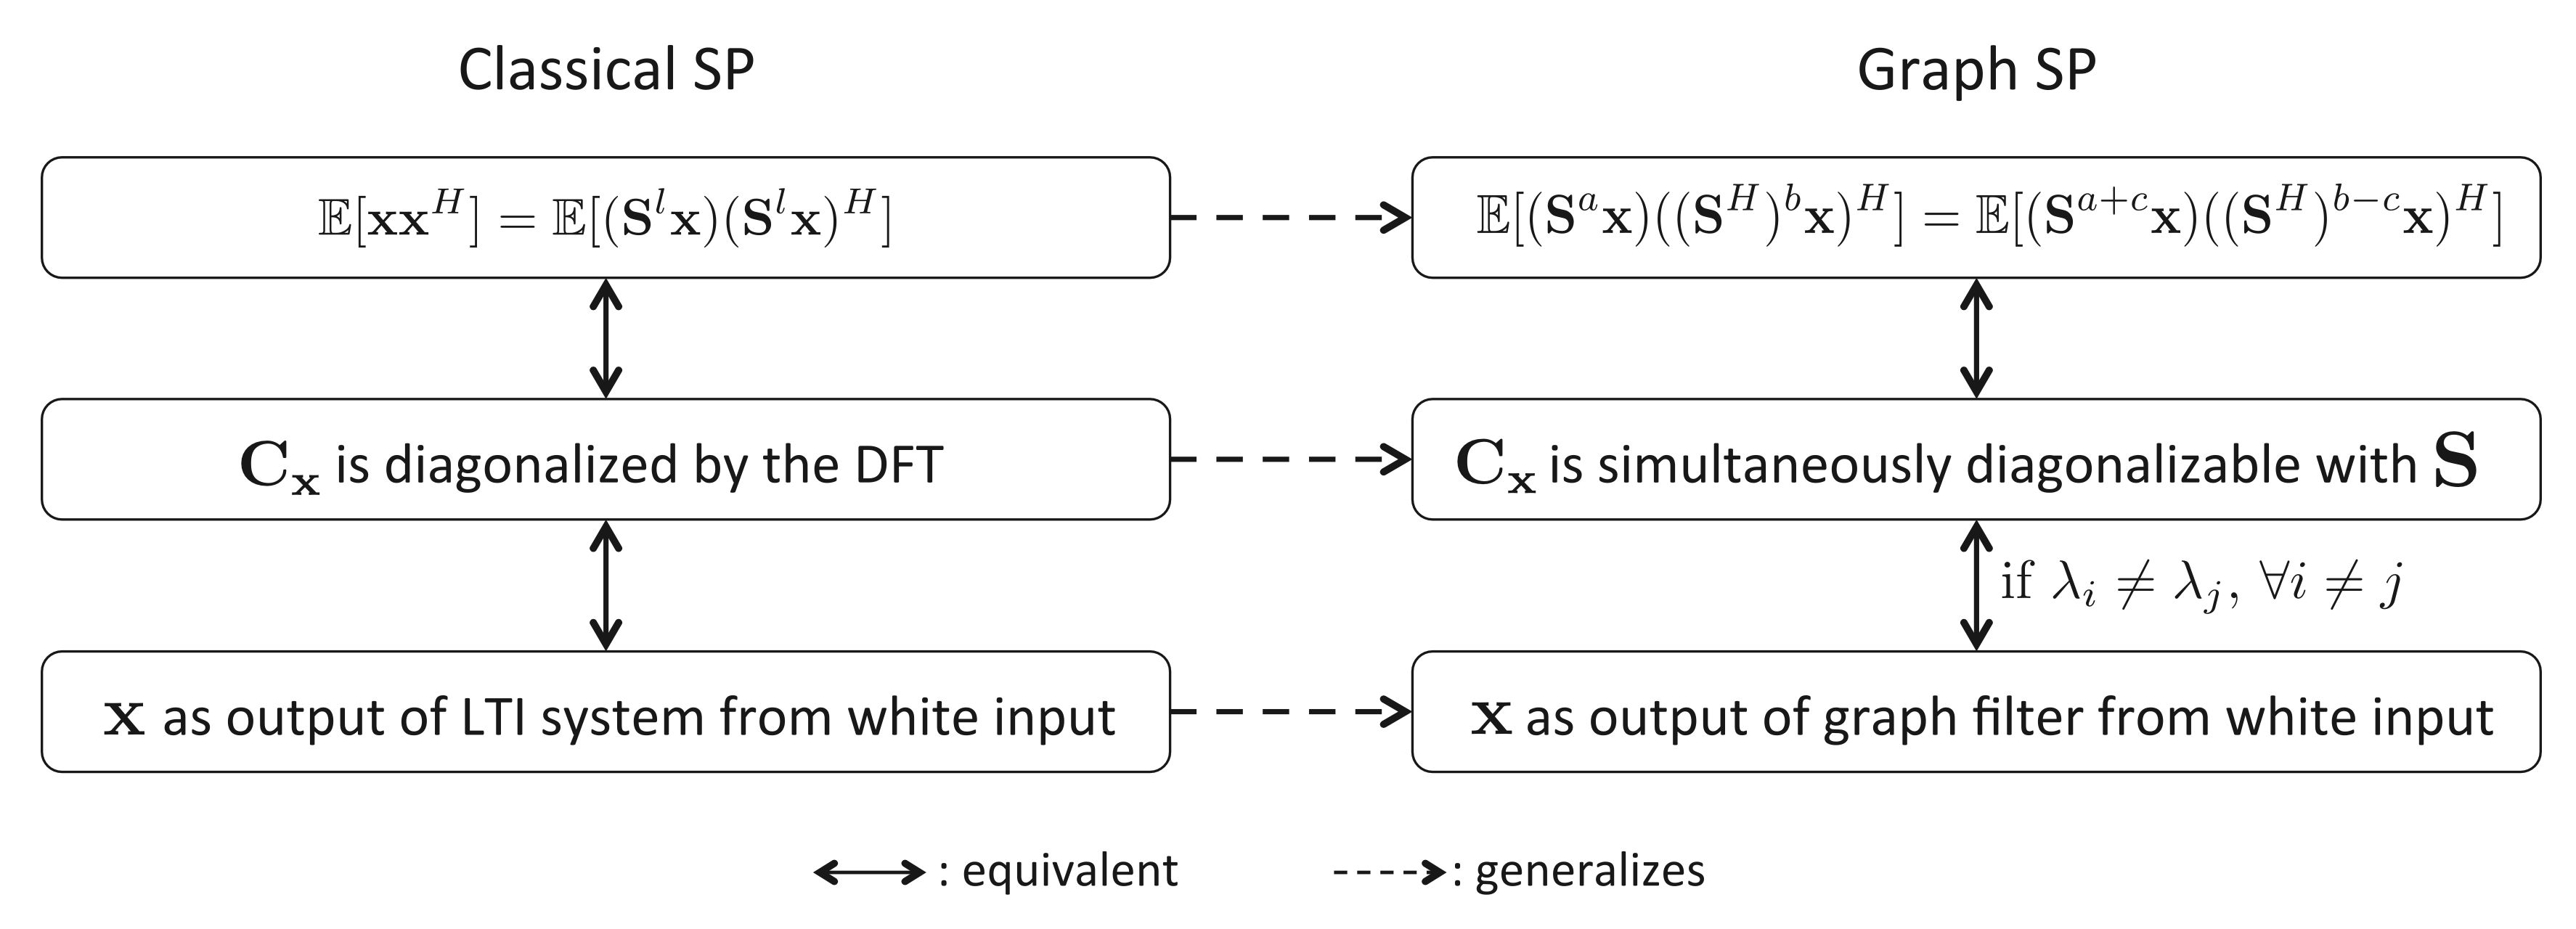
<figcaption aria-hidden="true">그림1: 교재에서 긁어온
다이어그램.</figcaption>
</figure>

## Coexisting Approaches

Stationary graph processes were first defined and analyzed in (Girault
2015). The fundamental problem identified there is that GSOs do not
preserve energy in general and therefore cannot be isometric (Gavili and
Zhang 2017). This problem is addressed in (Girault, Gonçalves, and
Fleury 2015) with the definition of an isometric graph shift that
preserves the eigenvector space of the Laplacian GSO but modifies its
eigenvalues.

A stationary graph process is then defined as one whose probability
distributions are invariant with respect to multiplications with the
isometric shift. One drawback of this approach is that the isometric
shift is a complex-valued operator and has a sparsity structure (if any)
different from ${\bf S}$. By contrast, the vertex-based definition in

$$\mathbb{E} \bigg[ \big({\bf S}^a{\bf x}\big)\Big(\big({\bf S}^H)^b {\bf x}\Big)^H  \bigg]=\mathbb{E}\bigg[\big({\bf S}^{a+c}{\bf x}\big)\Big(\big({\bf S}^H\big)^{b-c}{\bf x} \Big)^H \bigg]$$

is based on the original GSO ${\bf S}$, which is local and real-valued.
As a result, above Eq. provides intuition on the relations between
stationarity and locality, which can be leveraged to develop
stationarity tests or estimation schemes that work with local
information. Graph stationarity was also studied in (Perraudin and
Vandergheynst 2017) where the requirement of having a covariance matrix
diagonalizable by the eigenvectors of the Laplacian GSO is adopted as a
definition. This condition is shown to be equivalent to statistical
invariance with respect to the translation operator introduced in
(Shuman, Ricaud, and Vandergheynst 2016). When the shift ${\bf S}$
coincides with the Laplacian of the graph and the eigenvalues of
${\bf S}$ are all distinct, Definitions 12.1 and 12.2 are equivalent to
those in Perraudin and Vandergheynst (2017). Hence, the definitions
presented here differ from (Perraudin and Vandergheynst 2017) in that we
consider general normal shifts instead of Laplacians and that we see
Definition 12.1 as a definition, not a property. These are
mathematically minor differences that are important in practice though;
see Segarra et al. (2017) for more details.

# Summary

이 섹션에선 우리는 $\bar{\bf x}:=\mathbb{E}[{\bf x}]={\bf 0}$을
가정한다. 일반적인 우리에게 익숙한 정상시계열의 정의는 아래와 같다.

(정의1) ${\bf x}$가 정상시계열이다. $\overset{def}{\Longleftrightarrow}$
모든 $l=0,1,2,\dots$에 대하여
$\mathbb{E}[{\bf x}{\bf x}^H] = \mathbb{E}\big[({\bf B}^l{\bf x})({\bf B}^l{\bf x})^H \big]$이
성립한다.

또한 ${\bf x}$가 정상시계열이라면 적당한 white noise ${\bf n}$에 대하여
${\bf x} = {\bf H}{\bf n}$를 만족하는 shift invariant operater
${\bf H}=\sum_{l=0}^{N-1}h_l {\bf B}^l$가 존재함이 알려져 있다. (Wold’s
theorem의 특수한 형태인 듯) 이 정리를 마치 정의와 같이 사용하면 아래와
같이 시계열의 정상성을 정의할 수 있다.

(정의2) ${\bf x}$가 정상시계열이다. $\overset{def}{\Longleftrightarrow}$
임의의 ${\bf n}$에 대하여 ${\bf x}={\bf H}{\bf n}$를 만족하는 shift
invariant opertor ${\bf H}$가 항상 존재한다.

한편 ${\bf C}_{\bf x}=\mathbb{E}[{\bf x}{\bf x}^H]={\bf H}{\bf H}^H$와
같이 표현가능한데 ${\bf H}$와 ${\bf B}$는 같은 고유벡터행렬을 가지고[1]
${\bf H}^H{\bf H}$는 ${\bf H}$와 같은 고유벡터행렬을 가지므로[2] 결국
${\bf C}_{\bf x}$와 ${\bf B}$는 같은 고유벡터 행렬을 가진다고 볼 수
있다. 따라서 아래와 같이 쓸 수 있다.

$$\begin{align}
{\bf C}_{\bf x} & = {\bf \Psi} \cdot \text{적당한대각행렬} \cdot {\bf \Psi}^H \\ 
&= {\bf DFT}^H \cdot \text{적당한대각행렬} \cdot {\bf DFT}
\end{align}$$

이러한 직관에서 아래와 같이 시계열의 정상성에 대한 세번째 정의를 이해할
수 있다.

(정의3) ${\bf x}$가 정상시계열이다. $\overset{def}{\Longleftrightarrow}$
${\bf C}_{\bf x}$는 ${\bf DFT}$ 행렬로 대각화 가능하다.
(${\bf C}_{\bf x}$와 ${\bf B}$는 같은 고유벡터 행렬을 가진다.)

정상시계열에 대한 세가지 정의는 아래와 같이 정상 그래프신호로
확장가능하다.

<figure>
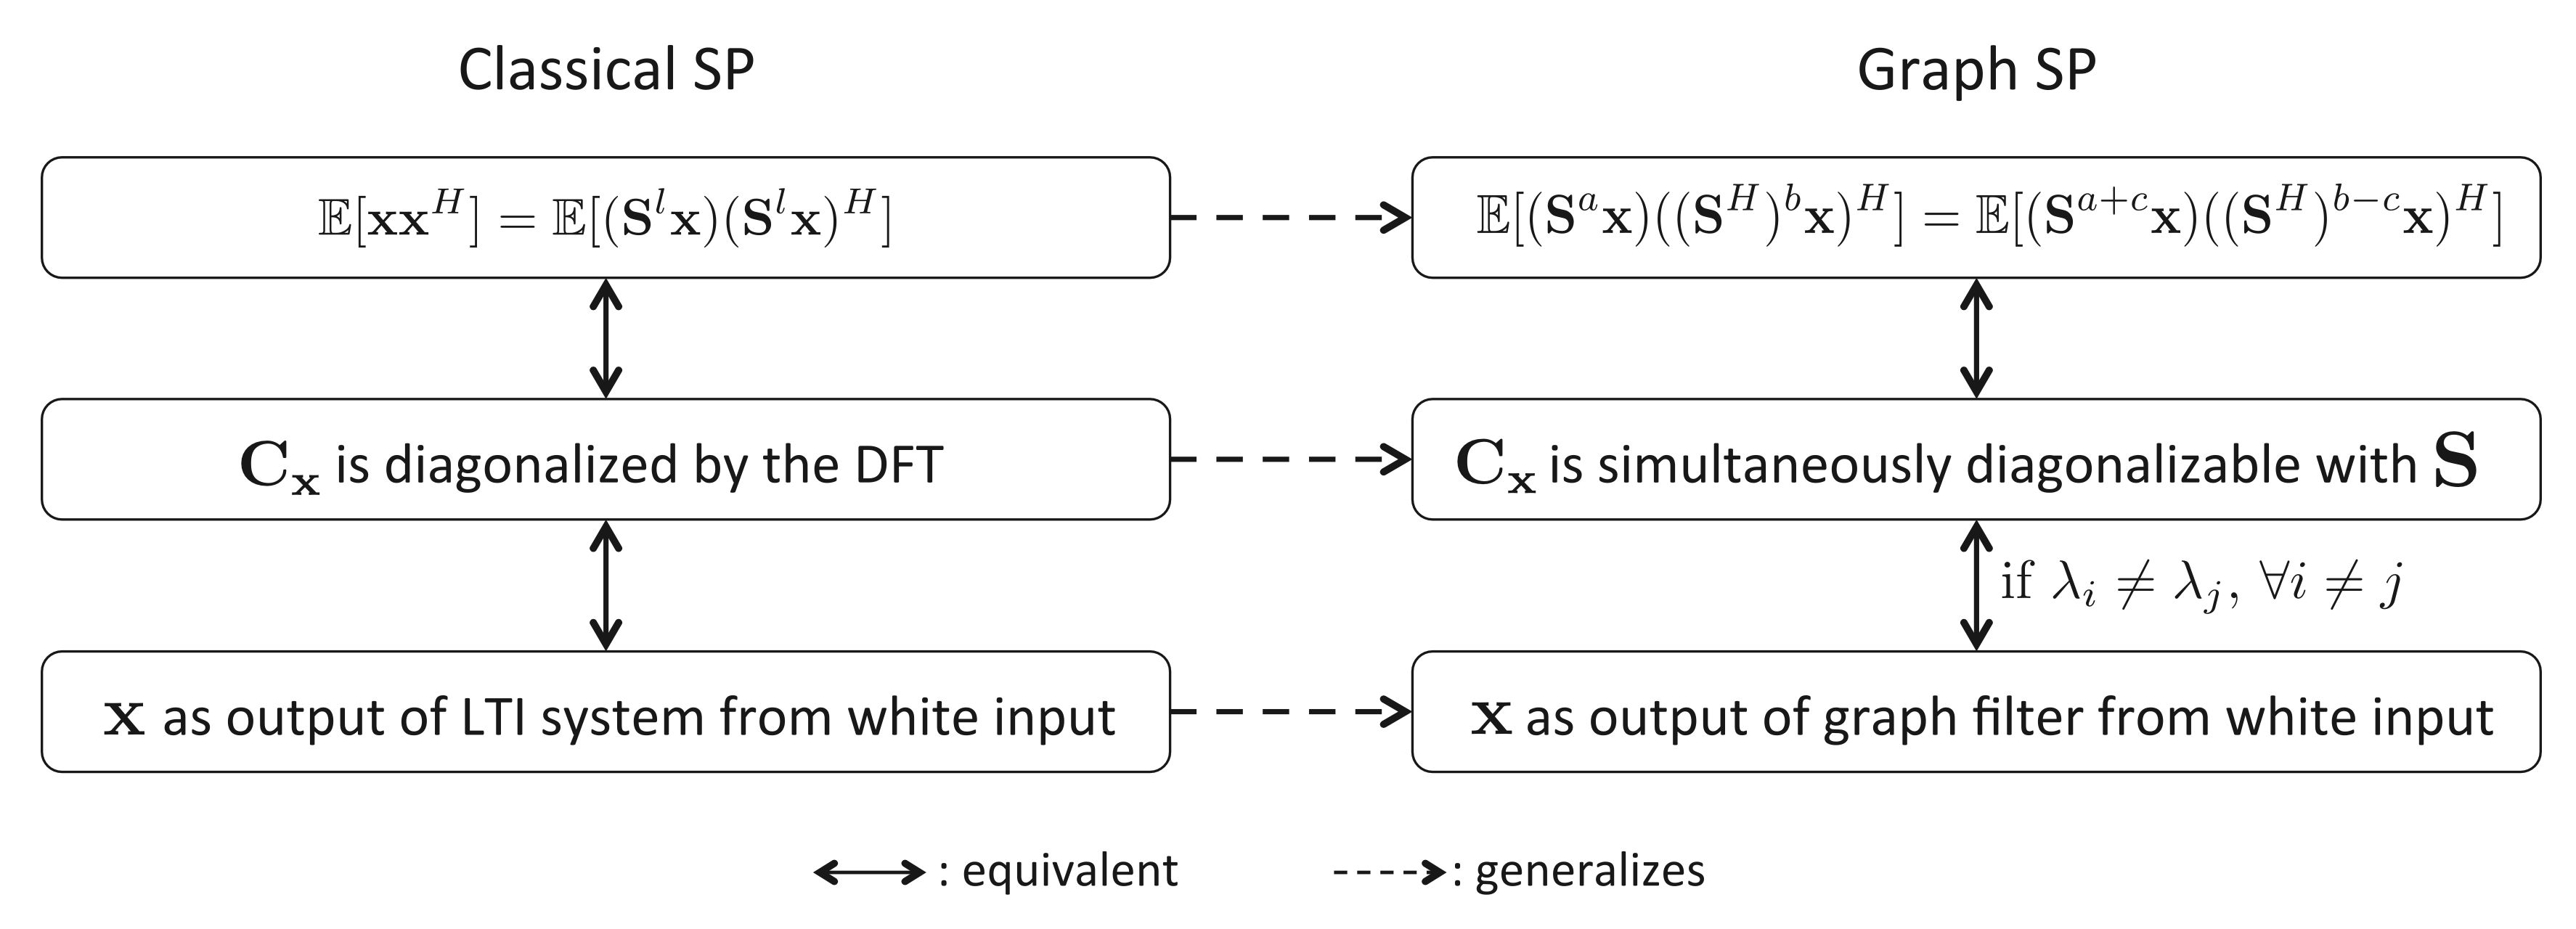
<figcaption aria-hidden="true">그림1: 교재에서 긁어온
다이어그램.</figcaption>
</figure>

차이점은 Wold’s theorem 이 성립하기 위해서
$\lambda_i \neq \lambda_j, \forall i\neq j$ 조건이 추가된다는 것이다.

Djuric, Petar, and Cédric Richard. 2018. *Cooperative and Graph Signal
Processing: Principles and Applications*. Academic Press.

Gavili, Adnan, and Xiao-Ping Zhang. 2017. “On the Shift Operator, Graph
Frequency, and Optimal Filtering in Graph Signal Processing.” *IEEE
Transactions on Signal Processing* 65 (23): 6303–18.

Girault, Benjamin. 2015. “Stationary Graph Signals Using an Isometric
Graph Translation.” In *2015 23rd European Signal Processing Conference
(EUSIPCO)*, 1516–20. IEEE.

Girault, Benjamin, Paulo Gonçalves, and Éric Fleury. 2015. “Translation
on Graphs: An Isometric Shift Operator.” *IEEE Signal Processing
Letters* 22 (12): 2416–20.

Marques, Antonio G, Santiago Segarra, Geert Leus, and Alejandro Ribeiro.
2017. “Stationary Graph Processes and Spectral Estimation.” *IEEE
Transactions on Signal Processing* 65 (22): 5911–26.

Perraudin, Nathanaël, and Pierre Vandergheynst. 2017. “Stationary Signal
Processing on Graphs.” *IEEE Transactions on Signal Processing* 65 (13):
3462–77.

Segarra, Santiago, Antonio G Marques, Gonzalo Mateos, and Alejandro
Ribeiro. 2017. “Network Topology Inference from Spectral Templates.”
*IEEE Transactions on Signal and Information Processing over Networks* 3
(3): 467–83.

Shuman, David I, Benjamin Ricaud, and Pierre Vandergheynst. 2016.
“Vertex-Frequency Analysis on Graphs.” *Applied and Computational
Harmonic Analysis* 40 (2): 260–91.

[1] shift invariant operator의 정의에 의하여
${\bf H}{\bf B}={\bf B}{\bf H}$가 성립하니까

[2] ${\bf H}{\bf H}^H={\bf \Psi}{\bf D}{\bf D}^H{\bf \Psi}^H$이니까,
여기에서 ${\bf D}$는 ${\bf H}$의 고유벡터행렬임